 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("us_baby_names.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


2. Find the most popular __Baby Girl Names__ in __2018__. 

In [4]:
df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [5]:
df.loc[(df.Gender == 'F') & (df.Year == 2018)].head(1)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688


3. Find the most popular __Baby Boy Names__ in __2018__.

In [6]:
df.loc[(df.Gender == 'M') & (df.Year == 2018)].head(1)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837


4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [7]:
def most_pop(year, gender,n):
    top = df.loc[(df.Year == year) & (df.Gender == gender )].head(n)
    return top

In [8]:
most_pop(2018,'M', 2)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267


## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [9]:
df_1880 = most_pop(1880,'M', 20)
df_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [10]:
df_2018 = most_pop(2018,'M', 20)

In [11]:
evergreen_M_names = df_1880[["Name", "Count"]].merge(df_2018[["Name", "Count"]], how = "inner", on = "Name",
                                                  suffixes = ['_1880', '_2018'])
evergreen_M_names

,Name,Count_1880,Count_2018
0,William,9532,14516
1,James,5927,13525
2,Henry,2444,10649


6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [12]:
df_1880 = most_pop(1880,'F', 20)
df_2018 = most_pop(2018,'F', 20)

evergree_F_names = df_1880[["Name", "Count"]].merge(df_2018[["Name", "Count"]], how = "inner", on = "Name",
                                                  suffixes = ['_1880', '_2018'])
evergree_F_names

,Name,Count_1880,Count_2018
0,Emma,2003,18688
1,Elizabeth,1939,8513
2,Ella,1156,8055


## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

In [13]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [14]:
agg = df.groupby(by = ["Name", "Gender"]).agg(Total = ('Count', 'sum'), Num_year = ('Count','count'),
                                             First_year = ('Year', 'min'), Last_year = ('Year', 'max'),
                                             Max_count = ('Count', 'max'))
agg

,,Total,Num_year,First_year,Last_year,Max_count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [15]:
# def best_year(group):
#     return group.nlargest(1, 'Count').Year

In [16]:
# agg["Best_Year"] = df.groupby(by = ["Name", "Gender"]).apply(best_year)

In [17]:
# agg.reset_index(inplace = True)

In [18]:
# agg

9. __Filter__ agg for the combination (Mary, F)

In [19]:
# agg.loc[(agg.Gender == 'F') & (agg.Name == 'Mary')]

## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

In [20]:
# top_df = agg.groupby(by = 'Gender').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop =  True)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# plt.figure(figsize = (15, 10))
# sns.barplot(x = 'Name', y = 'Total', data = top_df, hue = 'Gender')

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

In [23]:
df.groupby(by = "Year").Count.sum()

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

([<matplotlib.axis.XTick at 0x1e7d4723400>,
 [Text(0, 0, '1880'),
  Text(5, 0, '1885'),
  Text(10, 0, '1890'),
  Text(15, 0, '1895'),
  Text(20, 0, '1900'),
  Text(25, 0, '1905'),
  Text(30, 0, '1910'),
  Text(35, 0, '1915'),
  Text(40, 0, '1920'),
  Text(45, 0, '1925'),
  Text(50, 0, '1930'),
  Text(55, 0, '1935'),
  Text(60, 0, '1940'),
  Text(65, 0, '1945'),
  Text(70, 0, '1950'),
  Text(75, 0, '1955'),
  Text(80, 0, '1960'),
  Text(85, 0, '1965'),
  Text(90, 0, '1970'),
  Text(95, 0, '1975'),
  Text(100, 0, '1980'),
  Text(105, 0, '1985'),
  Text(110, 0, '1990'),
  Text(115, 0, '1995'),
  Text(120, 0, '2000'),
  Text(125, 0, '2005'),
  Text(130, 0, '2010'),
  Text(135, 0, '2015')])

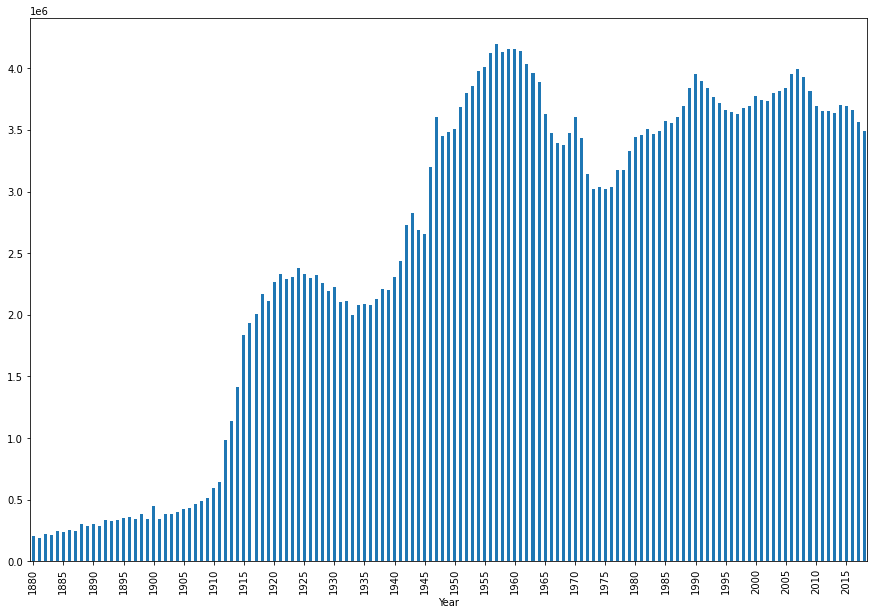

In [24]:
plt.figure(figsize = (15, 10))
df.groupby(by = "Year").Count.sum().plot(kind = 'bar')
plt.xticks(ticks = range(0,len(df.groupby(by = "Year").Count.sum()),5), labels = range(1880,2019,5))

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

([<matplotlib.axis.XTick at 0x1e7d4cf1d80>,
 [Text(0, 0, '1880'),
  Text(5, 0, '1885'),
  Text(10, 0, '1890'),
  Text(15, 0, '1895'),
  Text(20, 0, '1900'),
  Text(25, 0, '1905'),
  Text(30, 0, '1910'),
  Text(35, 0, '1915'),
  Text(40, 0, '1920'),
  Text(45, 0, '1925'),
  Text(50, 0, '1930'),
  Text(55, 0, '1935'),
  Text(60, 0, '1940'),
  Text(65, 0, '1945'),
  Text(70, 0, '1950'),
  Text(75, 0, '1955'),
  Text(80, 0, '1960'),
  Text(85, 0, '1965'),
  Text(90, 0, '1970'),
  Text(95, 0, '1975'),
  Text(100, 0, '1980'),
  Text(105, 0, '1985'),
  Text(110, 0, '1990'),
  Text(115, 0, '1995'),
  Text(120, 0, '2000'),
  Text(125, 0, '2005'),
  Text(130, 0, '2010'),
  Text(135, 0, '2015')])

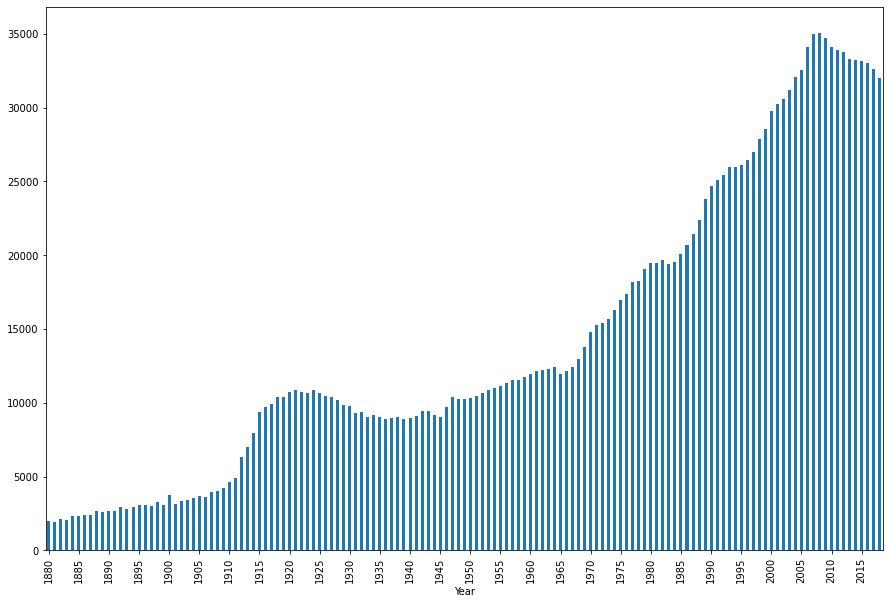

In [25]:
plt.figure(figsize = (15, 10))
df.groupby(by = "Year").Name.count().plot(kind = 'bar')
plt.xticks(ticks = range(0,len(df.groupby(by = "Year").Name.count()),5), labels = range(1880,2019,5))

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [26]:
df["Popularity"] = df.Count.div(df.groupby(by = ['Year', 'Gender']).Count.transform('sum'))*1000000

In [27]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642.481922
1,1880,Anna,F,2604,28617.271468
2,1880,Emma,F,2003,22012.440381
3,1880,Elizabeth,F,1939,21309.097303
4,1880,Minnie,F,1746,19188.078335
...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173
1957042,2018,Zyran,M,5,2.777173
1957043,2018,Zyrie,M,5,2.777173
1957044,2018,Zyron,M,5,2.777173


14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [28]:
df["Rank"] = df.groupby(by = ['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

In [29]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
1,1880,Anna,F,2604,28617.271468,2.0
2,1880,Emma,F,2003,22012.440381,3.0
3,1880,Elizabeth,F,1939,21309.097303,4.0
4,1880,Minnie,F,1746,19188.078335,5.0
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0
1957042,2018,Zyran,M,5,2.777173,13042.0
1957043,2018,Zyrie,M,5,2.777173,13042.0
1957044,2018,Zyron,M,5,2.777173,13042.0


## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

In [30]:
mary_df =df.loc[(df.Name == 'Mary') & (df.Gender == 'F')]

In [31]:
mary_df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
2000,1881,Mary,F,6919,75244.962100,1.0
3935,1882,Mary,F,8148,75551.475702,1.0
6062,1883,Mary,F,8012,71332.543915,1.0
8146,1884,Mary,F,9217,71439.090367,1.0
...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1476.702107,120.0
1826414,2015,Mary,F,2631,1477.713818,123.0
1859539,2016,Mary,F,2508,1419.988088,127.0
1892548,2017,Mary,F,2402,1397.211859,126.0


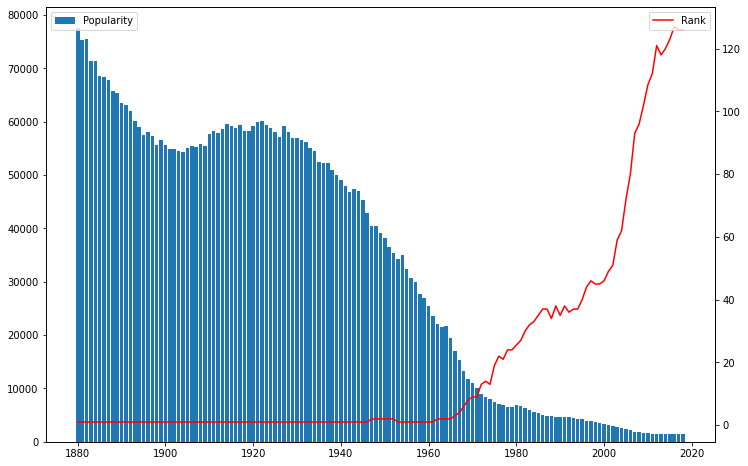

In [32]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.bar(x = mary_df.Year, height = mary_df.Popularity, label = "Popularity")
ax1.legend(loc = 2)

ax2 = ax1.twinx()
ax2.plot(mary_df.Year,mary_df.Rank,color = "r", label = "Rank")
ax2.legend(loc = 1)

plt.show()


16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [33]:
def plot_name(name, gender, critical_1 = "Popularity", critical_2 = "Rank"):
    data = df.loc[(df.Name == name ) & (df.Gender == gender), ["Name", "Gender" ,"Year", critical_1, critical_2]]
    fig, ax1 = plt.subplots(figsize = (12,8))
    
    ax1.bar(x = data.Year, height = data[critical_1], label = critical_1)
    ax1.legend(loc = 2)
    ax1.set_title(name)

    ax2 = ax1.twinx()
    ax2.plot(data.Year,data[critical_2],color = "r", label = critical_2)
    ax2.legend(loc = 1)

plt.show()

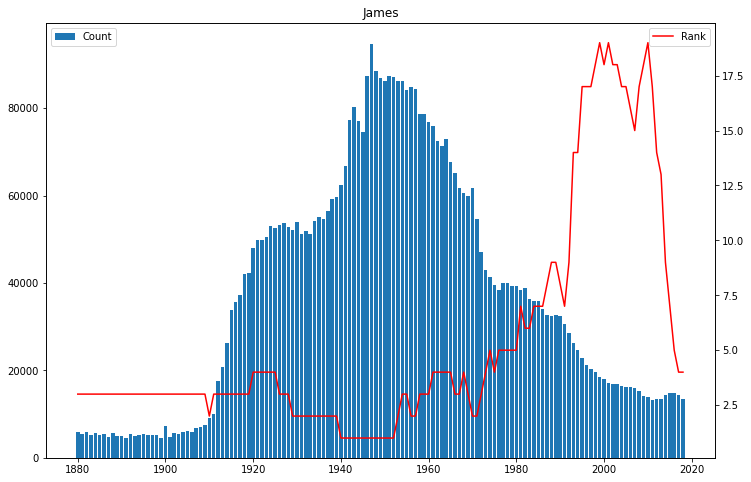

In [34]:
plot_name("James", "M", critical_1 = "Count")

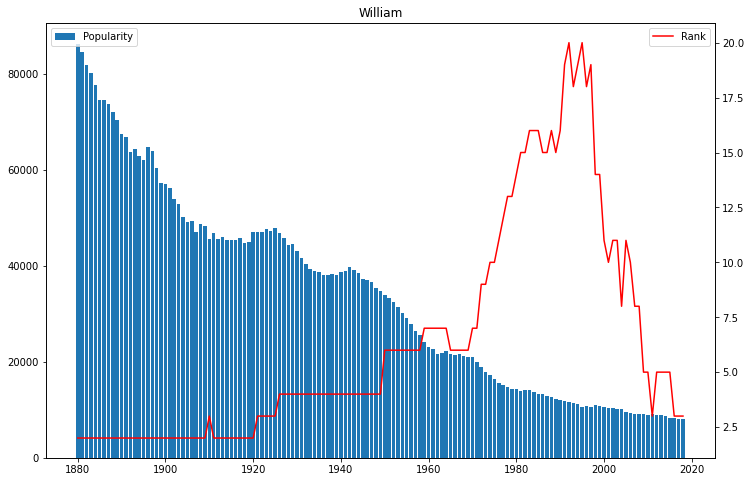

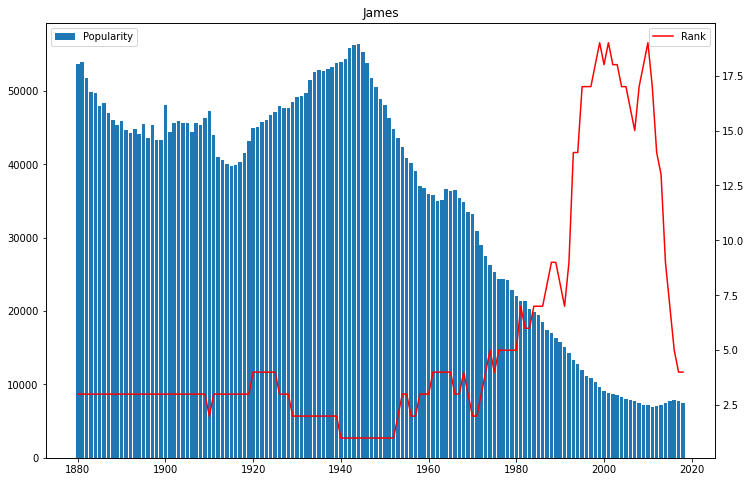

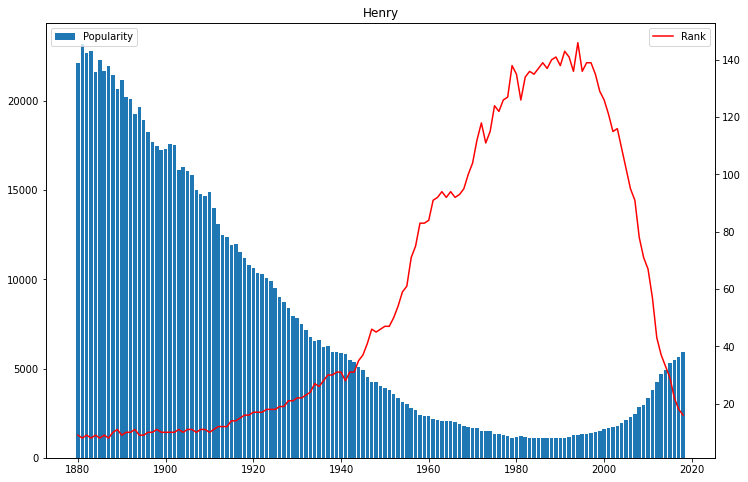

In [35]:
for name in evergreen_M_names.Name:
    plot_name(name, "M")

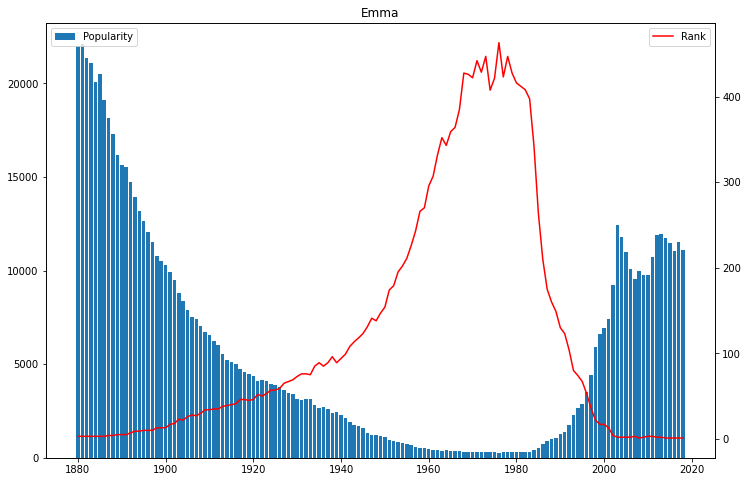

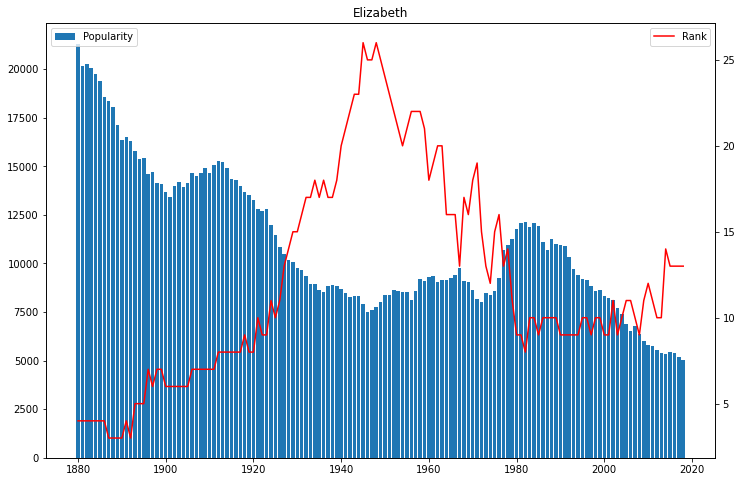

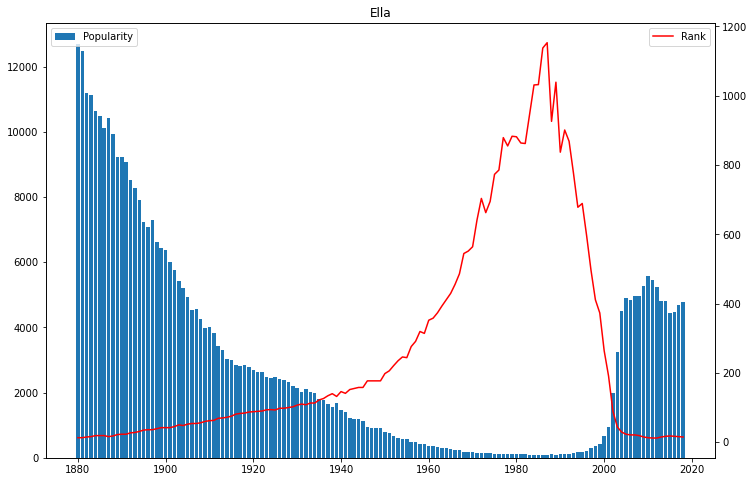

In [36]:
for name in evergree_F_names.Name:
    plot_name(name, "F")

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [37]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
1,1880,Anna,F,2604,28617.271468,2.0
2,1880,Emma,F,2003,22012.440381,3.0
3,1880,Elizabeth,F,1939,21309.097303,4.0
4,1880,Minnie,F,1746,19188.078335,5.0
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0
1957042,2018,Zyran,M,5,2.777173,13042.0
1957043,2018,Zyrie,M,5,2.777173,13042.0
1957044,2018,Zyron,M,5,2.777173,13042.0


In [38]:
df["Popularity_lag"] = df.groupby(by = ["Name","Gender"]).Popularity.shift()

In [39]:
df.loc[(df.Year > 1880) & (df.Popularity_lag.isna()), "Popularity_lag"] = 0

In [40]:
df["Pop_diff"]  = df.Popularity - df.Popularity_lag

In [41]:
df[df.Name == "Mary"]

,Year,Name,Gender,Count,Popularity,Rank,Popularity_lag,Pop_diff
0,1880,Mary,F,7065,77642.481922,1.0,NaN,NaN
1273,1880,Mary,M,27,244.366006,329.0,NaN,NaN
2000,1881,Mary,F,6919,75244.962100,1.0,77642.481922,-2397.519822
3238,1881,Mary,M,29,287.861191,301.0,244.366006,43.495185
3935,1882,Mary,F,8148,75551.475702,1.0,75244.962100,306.513601
...,...,...,...,...,...,...,...,...
1825554,2014,Mary,M,5,2.608835,13069.0,3.167940,-0.559105
1826414,2015,Mary,F,2631,1477.713818,123.0,1476.702107,1.011711
1859539,2016,Mary,F,2508,1419.988088,127.0,1477.713818,-57.725730
1892548,2017,Mary,F,2402,1397.211859,126.0,1419.988088,-22.776229


18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [42]:
df2 =  df[df.Year >= 1900].copy()

19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [43]:
df2.nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Popularity_lag,Pop_diff
431066,1947,Linda,F,99689,56236.224976,1.0,33546.795584,22689.429392
321479,1935,Shirley,F,42358,40398.317993,2.0,21874.356531,18523.961462
922468,1983,Ashley,F,33293,19930.187772,4.0,8774.639361,11155.548411
711426,1971,Jennifer,F,56783,34133.547814,1.0,26403.416193,7730.131621
726721,1972,Jennifer,F,63603,41813.296659,1.0,34133.547814,7679.748845
312301,1934,Shirley,F,22840,21874.356531,4.0,14203.488412,7670.868118
645417,1966,Michelle,F,27151,16047.477506,4.0,9186.178467,6861.299039
751941,1973,Jason,M,46683,29939.989187,3.0,23080.621302,6859.367885
844807,1979,Amanda,F,31928,19889.848316,3.0,13393.836368,6496.011948
696647,1970,Jennifer,F,46157,26403.416193,1.0,19977.960342,6425.455851


20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

In [44]:
top_5 = df2.nlargest(5, "Pop_diff")
top_5

,Year,Name,Gender,Count,Popularity,Rank,Popularity_lag,Pop_diff
431066,1947,Linda,F,99689,56236.224976,1.0,33546.795584,22689.429392
321479,1935,Shirley,F,42358,40398.317993,2.0,21874.356531,18523.961462
922468,1983,Ashley,F,33293,19930.187772,4.0,8774.639361,11155.548411
711426,1971,Jennifer,F,56783,34133.547814,1.0,26403.416193,7730.131621
726721,1972,Jennifer,F,63603,41813.296659,1.0,34133.547814,7679.748845


In [45]:
l = list(zip(top_5.Name, top_5.Gender))
l

[('Linda', 'F'),
 ('Shirley', 'F'),
 ('Ashley', 'F'),
 ('Jennifer', 'F'),
 ('Jennifer', 'F')]

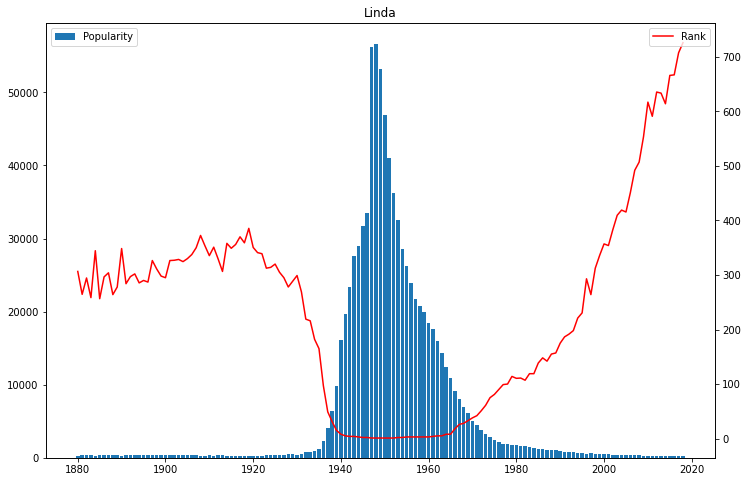

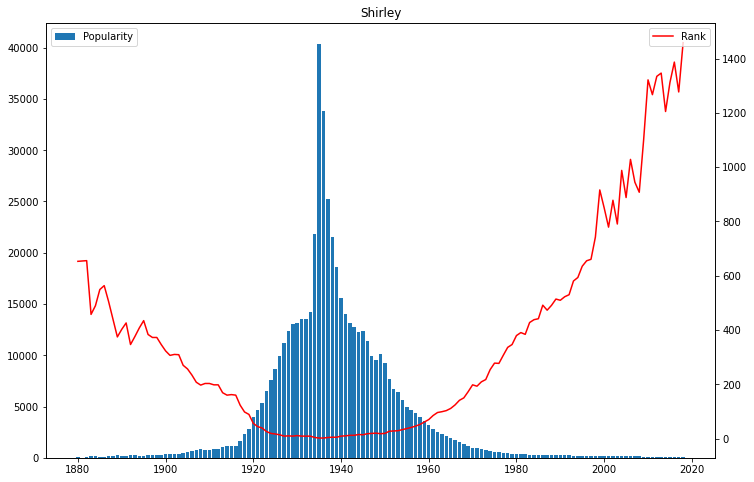

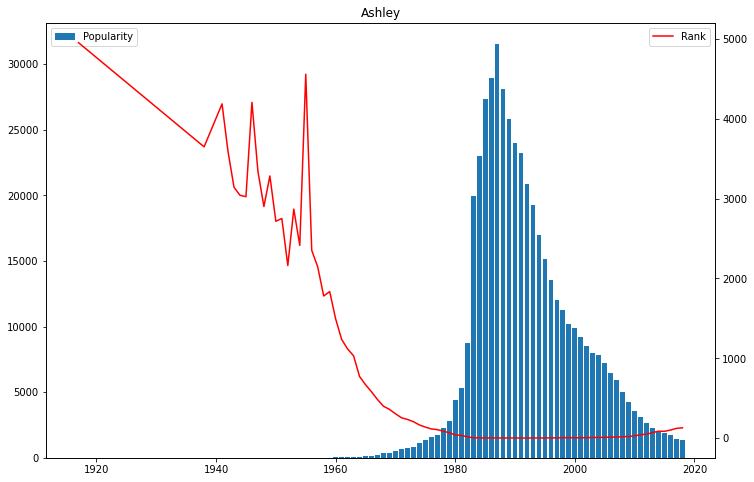

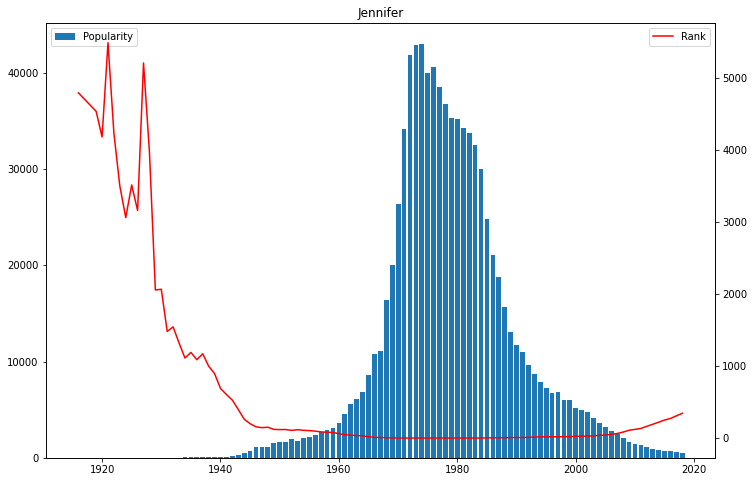

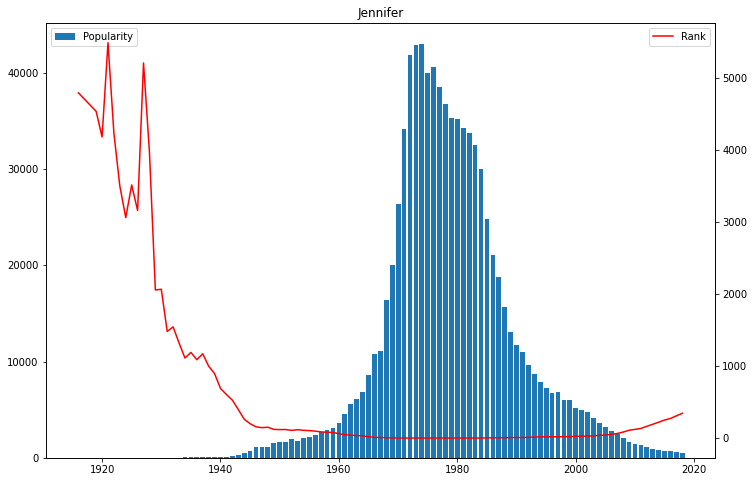

In [46]:
for name in l:
        plot_name(name = name[0], gender = name[1])

## Why does a Name´s Popularity suddenly change? (Part 2)

_No additional assignments on this. Watch the video for some more examples._

In [47]:
df2["%change"] = df2.Popularity.div(df2.Popularity_lag).sub(1).mul(100)

In [48]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Popularity_lag,Pop_diff,%change
52265,1900,Mary,F,16706,55724.187620,1.0,56526.608961,-802.421342,-1.419546
52266,1900,Helen,F,6343,21157.579437,2.0,21663.097634,-505.518197,-2.333545
52267,1900,Anna,F,6114,20393.731779,3.0,21950.622900,-1556.891120,-7.092697
52268,1900,Margaret,F,5304,17691.912554,4.0,18234.251555,-542.339000,-2.974287
52269,1900,Ruth,F,4765,15894.035317,5.0,16788.042382,-894.007065,-5.325261
...,...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0,3.798491,-1.021318,-26.887470
1957042,2018,Zyran,M,5,2.777173,13042.0,3.138835,-0.361662,-11.522185
1957043,2018,Zyrie,M,5,2.777173,13042.0,2.713208,0.063965,2.357542
1957044,2018,Zyron,M,5,2.777173,13042.0,8.139624,-5.362451,-65.880819


## Most Popular Unisex Names

### Way 1

In [57]:
unisex = df.groupby(by = ["Name", "Gender"]).Count.sum().unstack()

In [68]:
unisex.dropna(inplace = True)

NoneType

In [64]:
unisex_names = unisex.min(axis=1).sort_values(ascending = False).index

In [67]:
unisex.loc[unisex_names].head(5)

Gender,F,M
Name,,
Willie,146156.0,448946.0
Jordan,131004.0,374513.0
Leslie,267081.0,112726.0
Taylor,320446.0,110390.0
Jessie,167462.0,110212.0


### Way 2

In [71]:
unisex = unisex[unisex.min(axis = 1) > 10000]

In [79]:
unisex_names = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index

In [80]:
unisex.loc[unisex_names].head(5)

Gender,F,M
Name,,
Elisha,13762.0,13595.0
Quinn,31670.0,32071.0
Kerry,48549.0,49646.0
Blair,14922.0,14527.0
Kris,13504.0,14055.0
